In [18]:
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import read_data

In [19]:
dm = {
    "pfc1": "2023-12-06-02-57-59",
    "pfc2": "2023-12-06-02-58-00",
}

# dataName = 'pfc1'
dataName = 'pfc2'

folderName = dm[dataName]

folderPath = os.path.join(os.getcwd(), "o1_pfc_train", folderName)

data_pickle, data_json = read_data(folderPath)
data = data_pickle["data"]
tArray = data_pickle["tArray"]
nx = data_json["s1"]["n"]
dx = data_json["s1"]["dx"]
L = data_json["s1"]["L"]
tStart = data_json["s1"]["tStart"]
tEnd = data_json["s1"]["tEnd"]
dt = data_json["s1"]["dt"]
mTotal = data_json["s1"]["mTotal"]

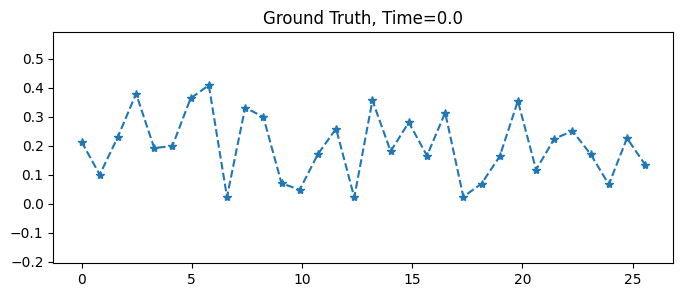

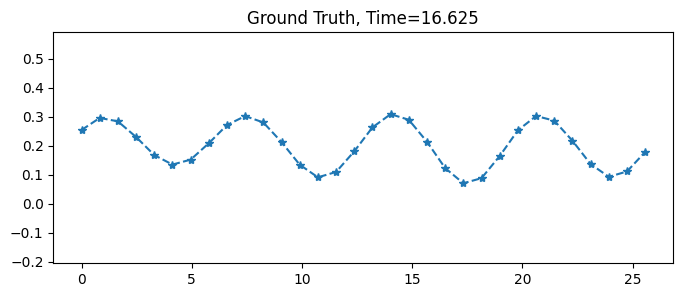

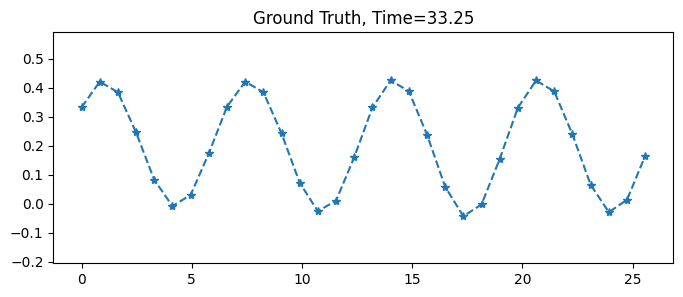

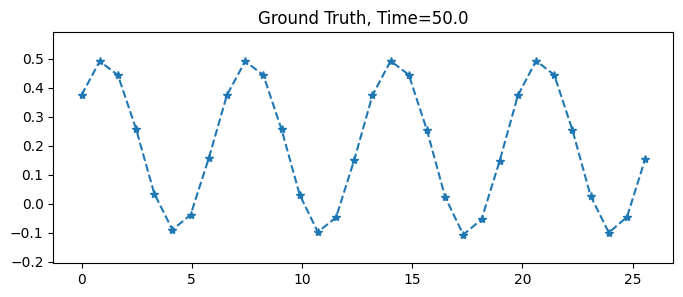

In [20]:
filenamePrefix = 'profile'
nFig = 4
minV = data[-1,:].min()
maxV = data[-1,:].max()
minV = minV - abs(maxV) * 0.2
maxV = maxV + abs(maxV) * 0.2


idxTSample = np.floor(np.linspace(0,tArray.shape[0]-1, nFig)).astype(int)
xp = np.arange(0,L,dx)
for t in idxTSample:
    tTime = tArray[t]
    fig, ax = plt.subplots(figsize=(8,3))
    ax.plot(xp, data[t,:], '*--')
    ax.set_title(f'Ground Truth, Time={tTime}')
    ax.set_ylim([minV,maxV])
    # plt.grid(True)
    tTimeFmt = f'{tTime:2.1f}'.replace(".","_")
    filename = f'{filenamePrefix}-{dataName}-t{tTimeFmt}.png'
    filePath = os.path.join(os.getcwd(), 'o5_visualize', filename)
    filepath = os.path.join(os.getcwd(), "o5_visualize", filename)
    plt.savefig(filepath, dpi=300, bbox_inches="tight")
